<a href="https://colab.research.google.com/github/YaraOrange/interkmel/blob/main/corr_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data_hackathon_28062024.csv", delimiter=';', on_bad_lines='skip')
data['bin_gender'] = data['athlete_gender'].apply(lambda g: -1 if g == 'мужчина' else 1)
data

,record_id,athlete_id,event_name,event_date,n_runners,finish_time,position,athlete_gender,athlete_age,best_time,...,dew_point,clouds,wind_speed,wind_deg,weather.main,weather.description,rain.1h,snow.1h,track_description_surface,bin_gender
0,6490,790055465,Нижний пруд,25.3.2023,22,1260,1,мужской,43,1260,...,"6,36",25,"3,67",223,Rain,light rain,"0,1",NaN,"асфальт, бетон",1
1,7459,790055465,Нижний пруд,6.5.2023,32,1098,3,мужской,43,1098,...,"-1,63",95,"4,18",83,Clouds,overcast clouds,NaN,NaN,"асфальт, бетон",1
2,10674,790055465,Нижний пруд,9.9.2023,35,1138,1,мужской,44,1098,...,"15,06",100,"0,8",155,Clouds,overcast clouds,NaN,NaN,"асфальт, бетон",1
3,13267,790055465,Нижний пруд,9.12.2023,25,1420,8,мужской,44,1098,...,"-5,17",100,"3,47",140,Clouds,overcast clouds,NaN,NaN,"асфальт, бетон",1
4,6755,790055533,Бутово,8.4.2023,69,1222,6,мужской,35,1222,...,"-3,17",0,3,110,Clear,clear sky,NaN,NaN,смешанное,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74979,12687,790165194,Воронеж Центральный парк,18.11.2023,35,1775,33,мужской,35,1775,...,"-4,83",75,3,40,Clouds,broken clouds,NaN,NaN,смешанное,1
74980,12934,790165194,Воронеж Центральный парк,25.11.2023,32,1726,24,мужской,35,1726,...,"-0,57",75,4,230,Clouds,broken clouds,NaN,NaN,смешанное,1
74981,13265,790165194,Солнечный остров,9.12.2023,35,1781,20,мужской,35,1726,...,"1,63",0,6,90,Clear,clear sky,NaN,NaN,твердое,1
74982,13577,790165194,Воронеж Центральный парк,23.12.2023,22,1996,22,мужской,35,1726,...,"2,56",100,4,140,Mist,mist,"0,26",NaN,смешанное,1


{'whiskers': [<matplotlib.lines.Line2D at 0x79e6569e7b20>,
 'caps': [<matplotlib.lines.Line2D at 0x79e6569e6e00>,
 'boxes': [<matplotlib.lines.Line2D at 0x79e6569e55d0>],
 'medians': [<matplotlib.lines.Line2D at 0x79e6569e7130>],
 'fliers': [<matplotlib.lines.Line2D at 0x79e6569e74f0>],
 'means': []}

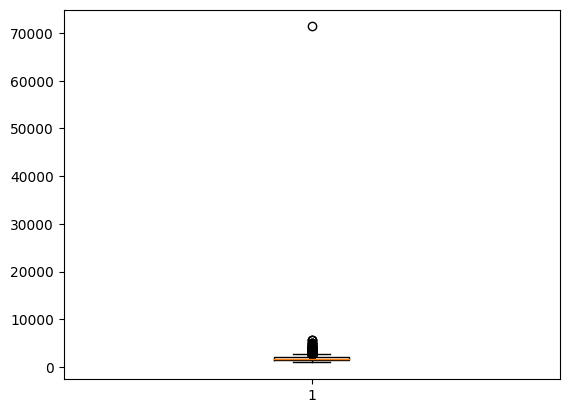

In [ ]:
plt.boxplot(data["finish_time"])

In [ ]:
def fun(df, column):
  # Вычисление границ IQR
  Q1, Q3 = df['Data'].quantile([0\.25, 0.75])
  IQR = Q3 – Q1
  нижняя_граница, верхняя_граница = Q1 – 1.5 * IQR, Q3 + 1.5 * IQR

# Отсеивание выбросов
  return df[(df['Data'] >= нижняя_граница) & (df['Data'] <= верхняя_граница)]

In [ ]:
names = ["feels_like", "wind_speed",
         "mean_time", "median_time", "temp", "dew_point",
         "wind_speed", "rain.1h", "snow.1h"]

for st in names:
  data[st] = data[st].str.replace(',','.')
  data[st].astype(float)

<Axes: >

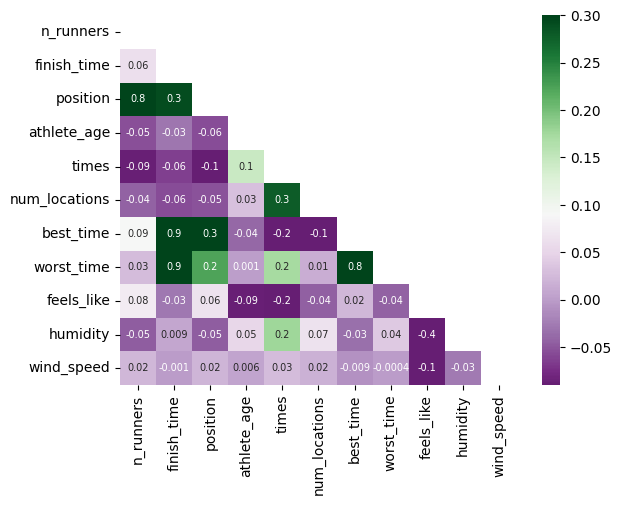

In [ ]:
data_for_car = data[['n_runners', 'finish_time', 'position', 'athlete_age', 'times', 'num_locations', 'best_time', 'worst_time', 'feels_like', 'humidity', 'wind_speed']].copy()
corr = data_for_car.corr()
mask = np.triu(np.ones_like(corr))
color1 = '#84df76ff'
color2 = '#e27ce2ff'
sns.heatmap(data_for_car.corr(),
            annot = True,
            annot_kws={"fontsize":7},
            vmin=-0.09,
            vmax=0.3,
            center= 0.09,
            cmap= 'PRGn',
            mask = mask,
            fmt = '.1g')


In [ ]:
id_age = data[['athlete_id', 'athlete_gender', 'athlete_age']].copy()
id_age = id_age[~data.athlete_id.duplicated(keep='first')]
id_age

,athlete_id,athlete_gender,athlete_age
0,790055465,мужской,43
4,790055533,мужской,35
5,790055717,мужской,42
7,790055774,мужской,48
10,790055798,мужской,35
...,...,...,...
74965,790161270,женский,76
74966,790161666,женский,41
74967,790161828,мужской,50
74968,790163379,мужской,23
